Import required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

Dataset contains 200 rows and 5 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

There is no missing values and duplicates in data

DATA VISUALIZATION

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

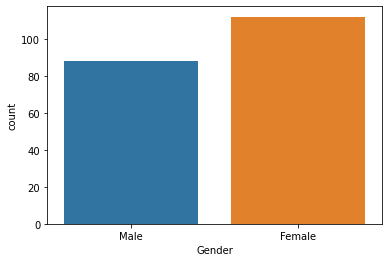

In [10]:
sns.countplot(x='Gender',data=df)

From the above graph we can observe that female cutomers are more than male customers

<AxesSubplot:xlabel='Annual Income (k$)'>

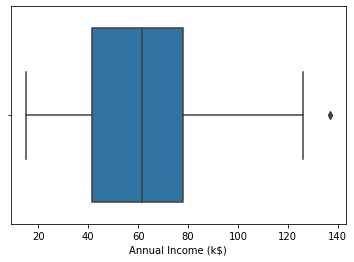

In [11]:
sns.boxplot(x='Annual Income (k$)',data=df)

we can observe that income for most of the cutomers are between 40 and (80k$)

<AxesSubplot:xlabel='Spending Score (1-100)'>

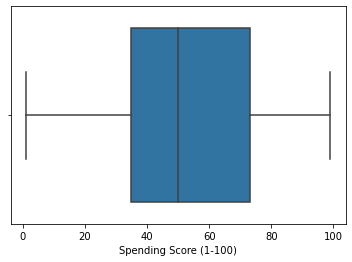

In [12]:
sns.boxplot(x='Spending Score (1-100)',data=df)

we can observe that spending score is near to 50 for most of the cutomers

Gender vs annual income

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

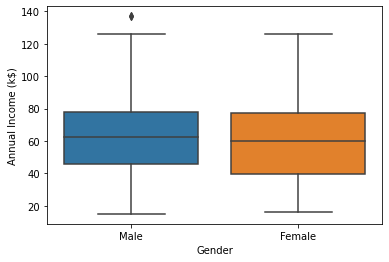

In [13]:
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df)

From the above graph we can observe that male cutomers income is slightly more than female customers

Gender vs spending score

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

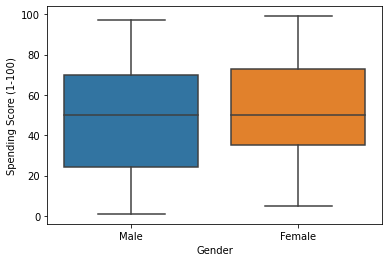

In [14]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df)

From the above graph we can observe that female cutomers spends more than male customers

In [15]:
## Remove id column as it is not necessary

df = df.drop(['CustomerID'], axis=1)

In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Feature Engineering

In [17]:
## encoding gender variable

In [18]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


finding the no clusters using elbow method

In [20]:
from sklearn.cluster import KMeans

x=df.iloc[:,[2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\BHANU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

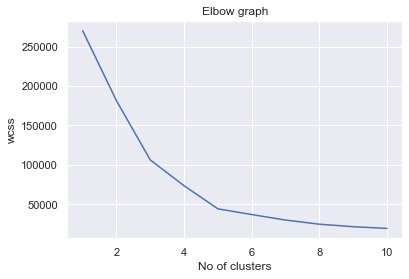

In [21]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss')

From the above graph we can observe that curve bends at 5. Therfore optimal no of clusters for the data is 5

#### Applying Kmeans

In [22]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

y=kmeans.fit_predict(x)

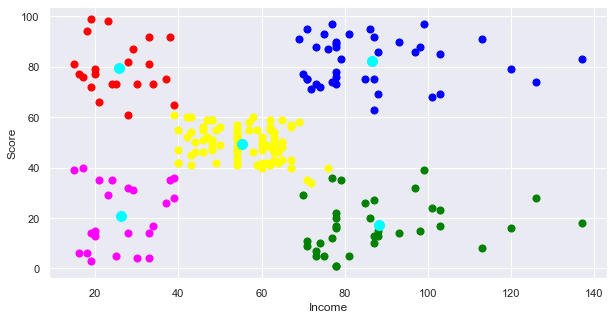

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='yellow',label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='red',label='cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='magenta',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')

plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

#### Hierarichal Clustering

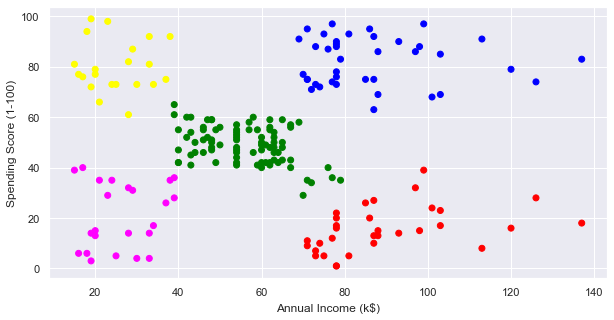

In [24]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agg.fit_predict(x)

colors = ['red', 'green', 'blue', 'yellow', 'magenta']
plt.figure(figsize=(10,5))
plt.scatter(x[:, 0], x[:, 1], c=[colors[label] for label in labels])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

From the above graphs we can observe that both hierarchical clustering and kmeans algorithms performed well by segmenting the customers.

There are different types of segments of cutomers based on amount spend and their annual income<br>
High income and low spending: This segment consists of high income people but spend low on products.<br>
High income and high spending:This segment consists of high income people and spend high amounts on products.<br>
Low income low spending: This segment consists of low income people and spend low amounts on products.<br>
Low income high spending: This segment consists of low income people but spend high amounts on products.
